In [44]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join as p_join
from os.path import split as p_split
from os.path import abspath
from pathlib import Path
TESTDIR = abspath('')
PROJDIR, _ = p_split(TESTDIR)

path_to_output = p_join(p_join(p_join(PROJDIR, "build"), "bin"), "output.csv")
path_to_data = p_join(TESTDIR, "output")
print("Test output:\t\t", path_to_data)
print("Terminal output:\t", path_to_output)

Test output:		 /home/theresa/ray/rayreworked/Tests/output
Terminal output:	 /home/theresa/ray/rayreworked/build/bin/output.csv


### output from TerminalApp

Index(['Index', 'Xloc', 'Yloc', 'Zloc', 'Weight', 'Xdir', 'Ydir', 'Zdir',
       'Energy', 'Stokes0', 'Stokes1', 'Stokes2', 'Stokes3', 'pathLength',
       'order', 'lastElement', 'extraParam'],
      dtype='object')
-8.829673588235757 3.912656197025627
(array([1., 2.]), array([396032,   3968]))
(315147, 17) (400000, 17)
-0.3090882538266991
-0.4864972474124323
0.0
-1.35878425476e-05
-6.959760485e-05
0.9999999974857716
1.0


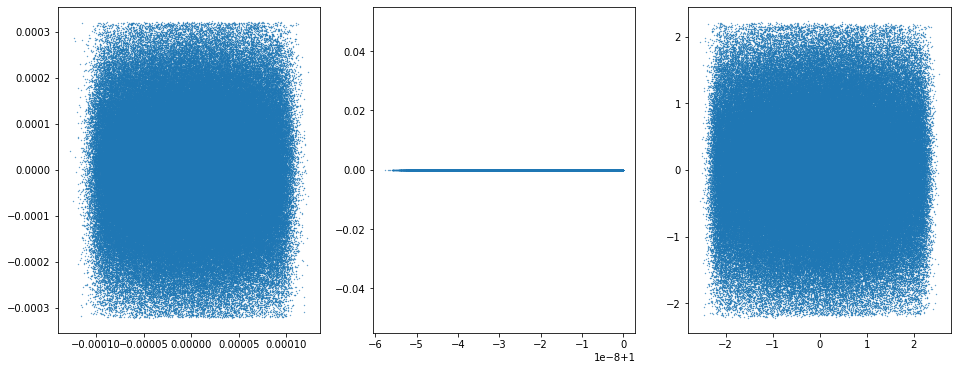

In [332]:
## test functions
data = pd.read_csv(path_to_output, sep=';',header=0)
print(data.columns)
#data = pd.read_csv(p_join(path_to_data,"testFile_randomUniform.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
filtered = data[data['extraParam']==54321]

print(min(data['Xloc']), (max(data['Yloc'])))
print(np.unique(data['Weight'], return_counts=True)[:20])

print(filtered.shape, data.shape,)
i = 0
print(filtered['Xloc'].values[i])
print(filtered['Yloc'].values[i])
print(filtered['Zloc'].values[i])

print(filtered['Xdir'].values[i])
print(filtered['Ydir'].values[i])
print(filtered['Zdir'].values[i])

print(filtered['Weight'].values[i])

#print(filtered['Weight'][:20])
#print(filtered['Energy'][:20])

s = 0.1
ax[0].scatter(filtered['Xdir'],filtered['Ydir'], s=s)
ax[1].scatter(filtered['Zdir'],filtered['Zloc'], s=s)
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], s=s)
#fig.tight_layout()
#array([1., 2.]), array([315150,  84850])) # without wastebox
#array([1., 2.]), array([396032,   3968])) # with wastebox

Index(['ImagePlane_RN', 'ImagePlane_RS', 'ImagePlane_RO', 'ImagePlane_OX',
       'ImagePlane_OY', 'ImagePlane_OZ', 'ImagePlane_DX', 'ImagePlane_DY',
       'ImagePlane_DZ', 'ImagePlane_EN', 'ImagePlane_PL', 'ImagePlane_S0',
       'ImagePlane_S1', 'ImagePlane_S2', 'ImagePlane_S3'],
      dtype='object')
315082


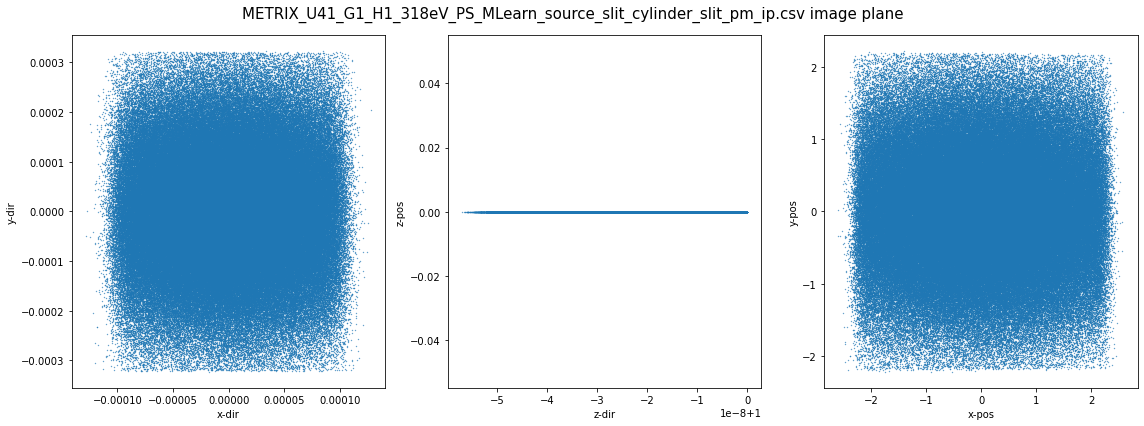

In [330]:
#load from file:
path = p_join(TESTDIR, "oldray_files")
path = p_join(path, "unittestData")
file = "METRIX_U41_G1_H1_318eV_PS_MLearn_source_slit_cylinder_slit_pm_ip.csv"
minus_first_rzp2 = p_join(path, file)
#minus_first_rzp2 = p_join(minus_first_rzp2, "data")

rzp_minus_first_rzp2_path = minus_first_rzp2 #p_join(minus_first_rzp2, 'imageplane_beam.csv')
rzp_minus_first_rzp2 = pd.read_csv(rzp_minus_first_rzp2_path, sep=';', decimal=',',header=0)

#ip_minus_first_rzp2_path = p_join(minus_first_rzp2, 'imageplane_beam.csv')
#ip_minus_first_rzp2 = pd.read_csv(ip_minus_first_rzp2_path, sep=';',header=0)
print(rzp_minus_first_rzp2.columns)
x = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[6]].values.astype(float)
y = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[7]].values.astype(float)
z = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[8]].values.astype(float)


ox = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[3]].values.astype(float)
oy = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[4]].values.astype(float)
oz = rzp_minus_first_rzp2[rzp_minus_first_rzp2.columns[5]].values.astype(float)
#assert(np.all(oz == 385))
print(len(ox))

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle(file+" image plane", fontsize=15)
size = 0.1
ax[0].scatter(x,y, s=size)
ax[0].set_xlabel('x-dir')
ax[0].set_ylabel('y-dir')
ax[1].scatter(z, oz, s=size)
ax[1].set_xlabel('z-dir')
ax[1].set_ylabel('z-pos')
ax[2].scatter(ox,oy, s=size)
ax[2].set_xlabel('x-pos')
ax[2].set_ylabel('y-pos')
fig.tight_layout()


### any output file from the test directionary

In [217]:
#folder = p_join(TESTDIR, "output")
file = p_join(path_to_data, "testFile_METRIX_U41_G1_H1_318eV_PS_MLearn_source_slit_cylinder_slit_ip.csv")

file= pd.read_csv(file, sep=';',header=0)
print(np.unique(file['extraParam'], return_counts=1))
filtered = file[file['Weight']==1]

x = filtered['Xdir'].values.astype(float)
y = filtered['Ydir'].values.astype(float)
z = filtered['Zdir'].values.astype(float)


ox = filtered['Xloc'].values.astype(float)
oy = filtered['Yloc'].values.astype(float)
oz = filtered['Zloc'].values.astype(float)
print(x.shape)
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
size = 0.5
ax[0].scatter(x,y, s=size)
ax[1].scatter(z,oz, s=size)
ax[2].scatter(ox,oy, s=size)
fig.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: '/home/theresa/ray/rayreworked/Tests/output/testFile_METRIX_U41_G1_H1_318eV_PS_MLearn_source_slit_cylinder_slit_ip.csv'

Index(['ImagePlane_RN', 'ImagePlane_RS', 'ImagePlane_RO', 'ImagePlane_OX',
       'ImagePlane_OY', 'ImagePlane_OZ', 'ImagePlane_DX', 'ImagePlane_DY',
       'ImagePlane_DZ', 'ImagePlane_EN', 'ImagePlane_PL', 'ImagePlane_S0',
       'ImagePlane_S1', 'ImagePlane_S2', 'ImagePlane_S3'],
      dtype='object')
(1974,)


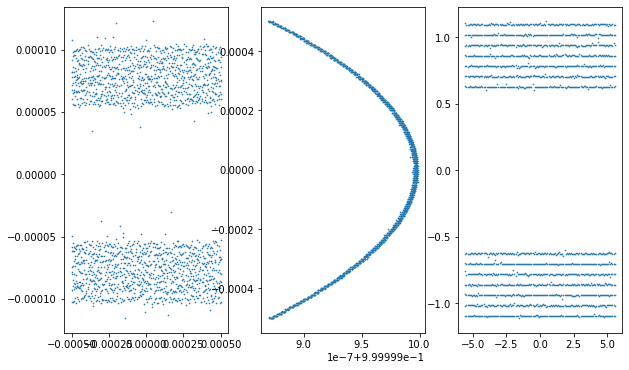

In [182]:
path = p_join(TESTDIR, "oldray_files")
path = p_join(path, "unittestData")
file = p_join(path, "slit_ip.csv")

file= pd.read_csv(file, sep='\t',header=0)

print(file.columns)
x = file[file.columns[6]].values.astype(float)
y = file[file.columns[7]].values.astype(float)
z = file[file.columns[8]].values.astype(float)


ox = file[file.columns[3]].values.astype(float)
oy = file[file.columns[4]].values.astype(float)
oz = file[file.columns[5]].values.astype(float)

print(x.shape)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
size = 0.4
ax[0].scatter(x,y, s=size)
ax[1].scatter(z,x, s=size)
ax[2].scatter(ox,oy, s=size)

(1974,)


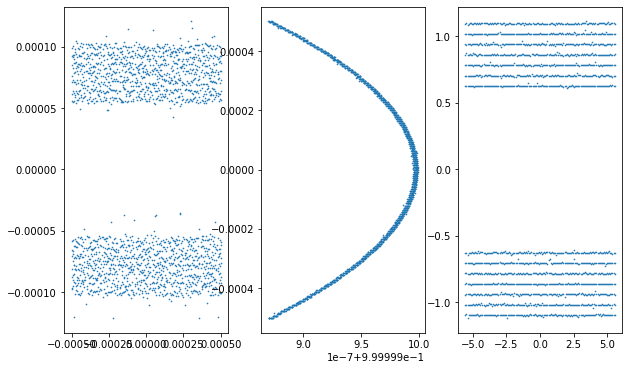

In [180]:
folder = p_join(TESTDIR, "output")
file = p_join(folder, "testFile_slit.csv")

file= pd.read_csv(file, sep=';',header=0)

filtered = file[file['extraParam']==21]

x = filtered['Xdir'].values.astype(float)
y = filtered['Ydir'].values.astype(float)
z = filtered['Zdir'].values.astype(float)


ox = filtered['Xloc'].values.astype(float)
oy = filtered['Yloc'].values.astype(float)
oz = filtered['Zloc'].values.astype(float)
print(x.shape)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
size = 0.4
ax[0].scatter(x,y, s=size)
ax[1].scatter(z,x, s=size)
ax[2].scatter(ox,oy, s=size)

# spec1-first_rzp4mm

## RZP

## Image Plane

0        21
2        21
5        21
6        21
7        21
         ..
19988    21
19989    21
19994    21
19995    21
19996    21
Name: extraParam, Length: 9291, dtype: int64


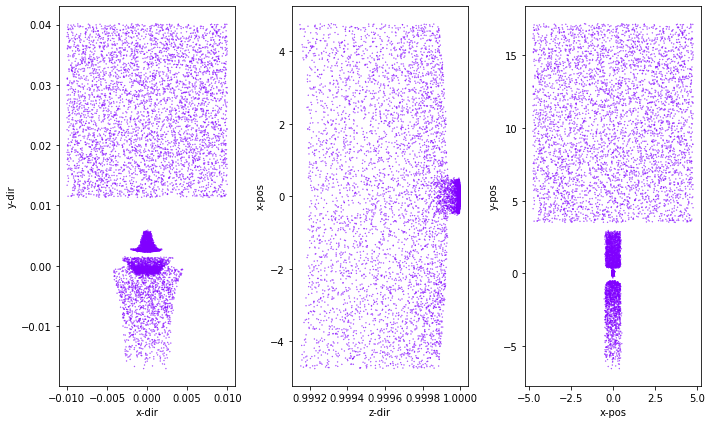

In [112]:
data_ip = pd.read_csv(p_join(path_to_data,"testFile_Spec1-first_rzp4mm.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

"""
use ==1 to get only those that hit the rzp and then the image plane (like old ray and the image below)
use !=0 to get all rays that hit the image plane (even those that do not hit the rzp first)
use ==2 to get all rays that miss the rzp and directly go to the image plane
"""
filtered = data_ip[data_ip['Weight']==1]

print(filtered.extraParam)
assert(np.all(filtered[filtered['Weight']!=0]['Zloc'].values == 0))

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], c=filtered['extraParam'], cmap='rainbow', s=0.1)
ax[0].set_xlabel('x-dir')
ax[0].set_ylabel('y-dir')
ax[1].scatter(filtered['Zdir'],filtered['Xloc'], c=filtered['extraParam'], cmap='rainbow', s=0.1)
ax[1].set_xlabel('z-dir')
ax[1].set_ylabel('x-pos')
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], c=filtered['extraParam'], cmap='rainbow', s=0.1)
ax[2].set_xlabel('x-pos')
ax[2].set_ylabel('y-pos')
fig.tight_layout()

should look like this:
![](oldray_files/spec1-first_rzp4mm/imageplane.png)

# spec1+first_rzp4mm

## RZP

![](output/spec1+first_rzp4mm/rzp.png)

## IMAGE PLANE

(9511, 17)


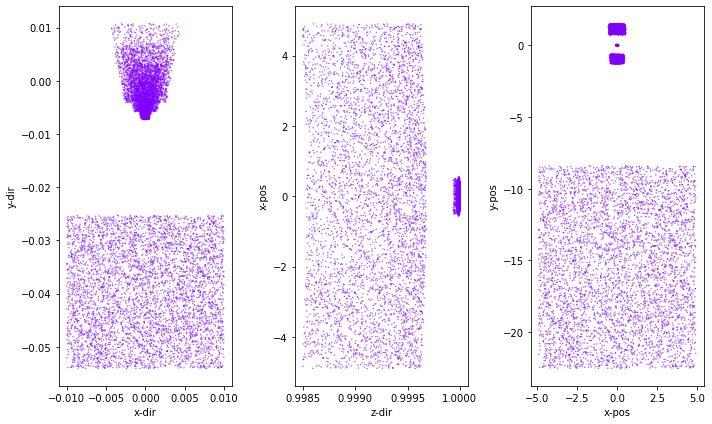

In [113]:
data_rzp = pd.read_csv(p_join(path_to_data,"testFile_Spec1+first_rzp4mm.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
"""
use ==1 to get only those that hit the rzp and then the image plane (like old ray and the image below)
use !=0 to get all rays that hit the image plane (even those that do not hit the rzp first)
use ==2 to get all rays that miss the rzp and directly go to the image plane
"""
filtered = data_rzp[data_rzp['Weight']==1] 
print(filtered.shape)

assert(np.all(filtered[filtered['Weight']==1]['Zloc'].values == 0))

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[0].set_xlabel('x-dir')
ax[0].set_ylabel('y-dir')
ax[1].scatter(filtered['Zdir'],filtered['Xloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[1].set_xlabel('z-dir')
ax[1].set_ylabel('x-pos')
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[2].set_xlabel('x-pos')
ax[2].set_ylabel('y-pos')
fig.tight_layout()

should look like this:
![](oldray_files/spec1+first_rzp4mm/imageplane.png)

# spec1-first_rzp02

## rzp only

## image plane

(9312, 17)


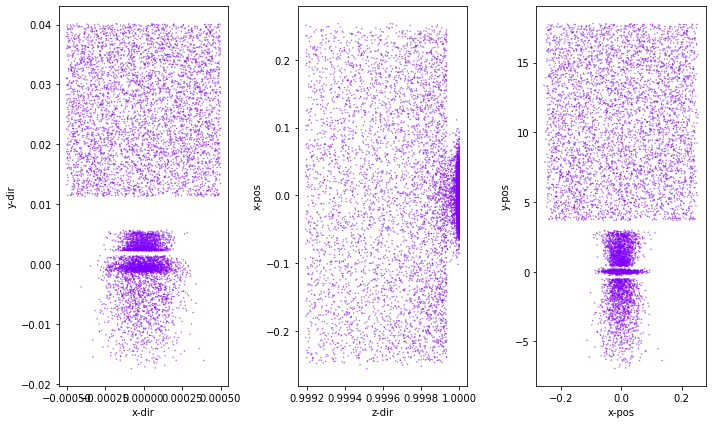

In [115]:
data_rzp = pd.read_csv(p_join(path_to_data,"testFile_Spec1-first_rzp02mm.csv"), sep=';',header=0)
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

"""
use ==1 to get only those that hit the rzp and then the image plane (like old ray and the image below)
use !=0 to get all rays that hit the image plane (even those that do not hit the rzp first)
use ==2 to get all rays that miss the rzp and directly go to the image plane
"""
filtered = data_rzp[data_rzp['Weight']==1]
print(filtered.shape)
assert(np.all(filtered[filtered['Weight']!=0]['Zloc'].values == 0))

ax[0].scatter(filtered['Xdir'],filtered['Ydir'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[0].set_xlabel('x-dir')
ax[0].set_ylabel('y-dir')
ax[1].scatter(filtered['Zdir'],filtered['Xloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[1].set_xlabel('z-dir')
ax[1].set_ylabel('x-pos')
ax[2].scatter(filtered['Xloc'],filtered['Yloc'], c=filtered['Weight'], cmap='rainbow', s=0.1)
ax[2].set_xlabel('x-pos')
ax[2].set_ylabel('y-pos')
fig.tight_layout()

should look like this:
![](oldray_files/spec1-first_rzp02/imageplane.png)